<a href="https://colab.research.google.com/github/Hurri301/Hurri301/blob/main/ThyroidCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
df = pd.read_csv('ThyroidDataset.csv')
df.head()

,Age recode(Years),Sex,Year of diagnosis,SEER cause-specific death classification,SEER other cause of death classification,Survival months,Race,Race and origin recode,Race/ethnicity,Patient ID,Diagnostic Confirmation,Survival Prediction
0,27,Female,1975,Alive or dead of other cause,Alive or dead due to cancer,527,White,Non-Hispanic White,White,324,Positive histology,Alive
1,41,Female,1978,Alive or dead of other cause,Dead,275,White,Non-Hispanic White,White,477,Positive histology,Dead
2,55,Male,1981,Alive or dead of other cause,Dead,233,White,Hispanic (All Races),White,572,Positive histology,Dead
3,37,Male,1975,Alive or dead of other cause,Dead,461,White,Non-Hispanic White,White,596,Positive histology,Dead
4,39,Female,1988,Alive or dead of other cause,Alive or dead due to cancer,366,White,Non-Hispanic White,White,884,Positive histology,Alive


In [ ]:
df.shape

(72116, 12)

In [ ]:
df.dtypes

Age recode(Years)                            int64
Sex                                         object
Year of diagnosis                            int64
SEER cause-specific death classification    object
SEER other cause of death classification    object
Survival months                              int64
Race                                        object
Race and origin recode                      object
Race/ethnicity                              object
Patient ID                                   int64
Diagnostic Confirmation                     object
Survival Prediction                         object
dtype: object

In [ ]:
# Convert object data types to appropriate types
df['Sex'] = df['Sex'].astype(str)
df['SEER cause-specific death classification'] = df['SEER cause-specific death classification'].astype(str)
df['SEER other cause of death classification'] = df['SEER other cause of death classification'].astype(str)
df['Race'] = df['Race'].astype(str)
df['Race and origin recode'] = df['Race and origin recode'].astype(str)
df['Race/ethnicity'] = df['Race/ethnicity'].astype(str)
df['Diagnostic Confirmation'] = df['Diagnostic Confirmation'].astype(str)
df['Survival Prediction'] = df['Survival Prediction'].astype(str)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['SEER cause-specific death classification'] = label_encoder.fit_transform(df['SEER cause-specific death classification'])
df['SEER other cause of death classification'] = label_encoder.fit_transform(df['SEER other cause of death classification'])
df['Race'] = label_encoder.fit_transform(df['Race'])
df['Race and origin recode'] = label_encoder.fit_transform(df['Race and origin recode'])
df['Race/ethnicity'] = label_encoder.fit_transform(df['Race/ethnicity'])
df['Diagnostic Confirmation'] = label_encoder.fit_transform(df['Diagnostic Confirmation'])
df['Survival Prediction'] = label_encoder.fit_transform(df['Survival Prediction'])

# Scale numerical features
scaler = StandardScaler()
df[['Year of diagnosis', 'Survival months']] = scaler.fit_transform(df[['Year of diagnosis', 'Survival months']])


In [ ]:
X = df.drop(['Survival Prediction'], axis=1)
y = df['Survival Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


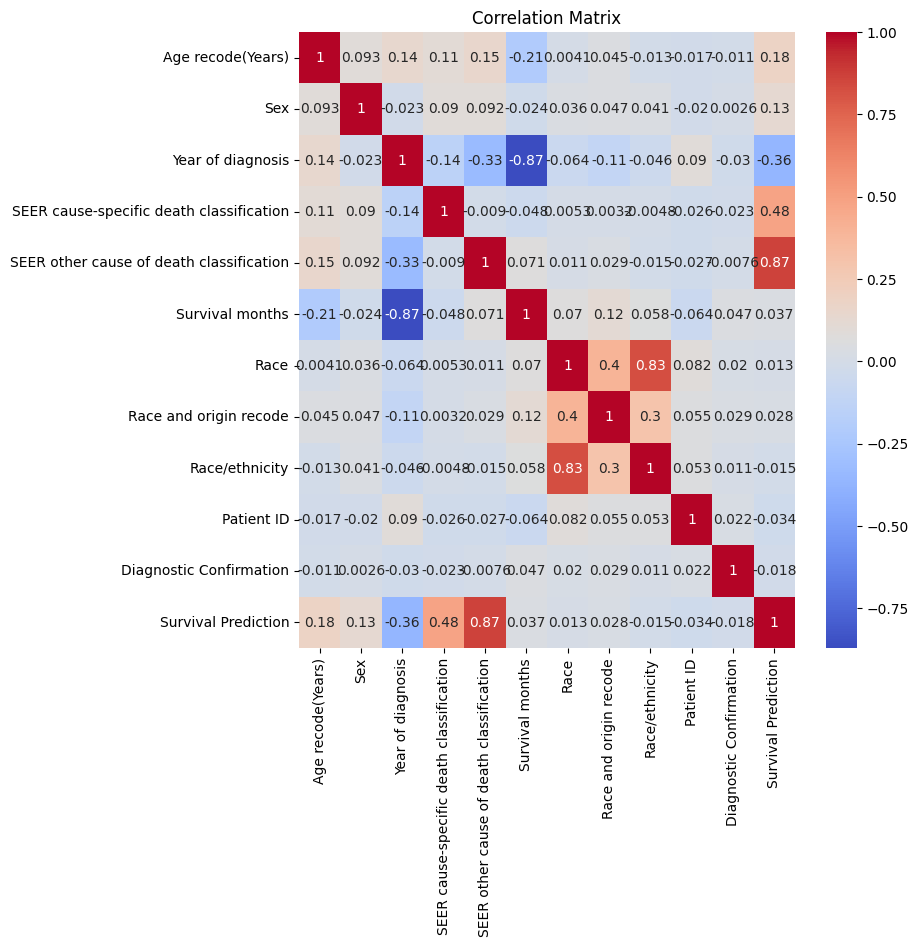

In [ ]:
import os
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Logistic Regression:
Train MSE: 0.11181792969562504
Test MSE: 0.11113422074320577
Train R2 Score: -0.1258952791709762
Test R2 Score: -0.12502924888854205
Train Accuracy: 0.8881820703043749
Test Accuracy: 0.8888657792567942


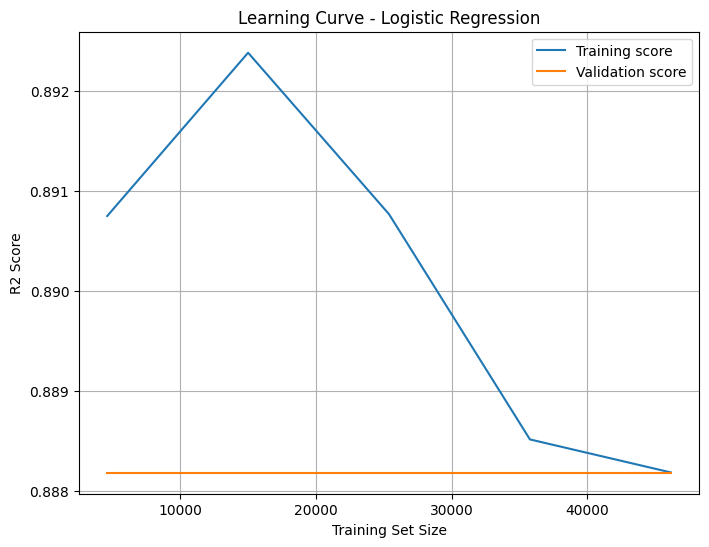

In [ ]:
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Logistic Regression:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Regression:
Train MSE: 0.0
Test MSE: 0.0
Train R2 Score: 1.0
Test R2 Score: 1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


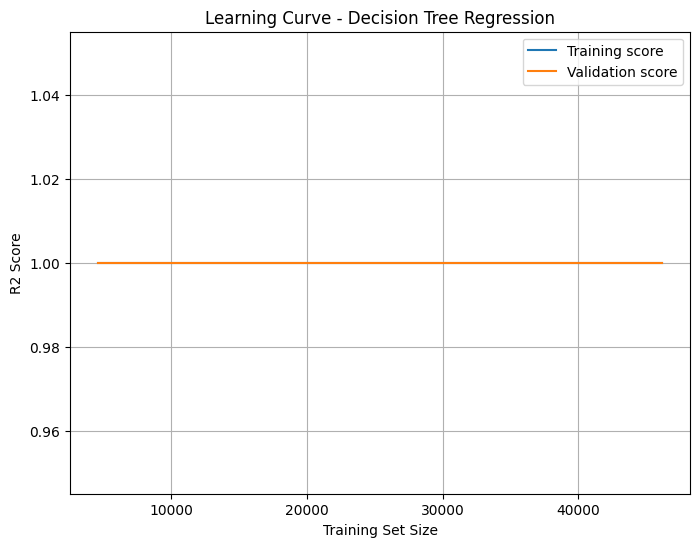

In [ ]:
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, np.round(y_train_pred))
accuracy_test = accuracy_score(y_test, np.round(y_test_pred))

print("Decision Tree Regression:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve - Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.show()

Support Vector Regression:
Train MSE: 0.09945314375420826
Test MSE: 0.09890607273663388
Train R2 Score: -0.0013941892536810663
Test R2 Score: -0.001241777530647692
Train Accuracy: 0.8881820703043749
Test Accuracy: 0.8888657792567942


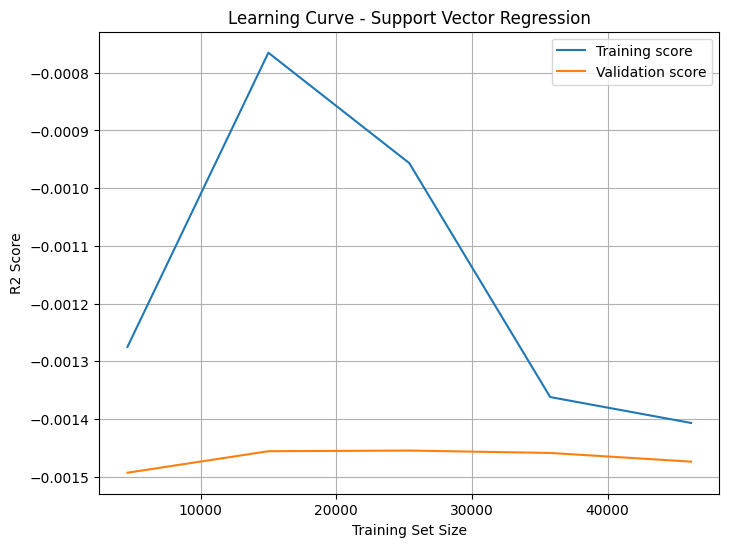

In [ ]:
from sklearn.metrics import accuracy_score

svr = SVR()
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, np.round(y_train_pred))
accuracy_test = accuracy_score(y_test, np.round(y_test_pred))

print("Support Vector Regression:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(svr, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve - Support Vector Regression')
plt.legend()
plt.grid(True)
plt.show()


K-Nearest Neighbor Regression:
Train MSE: 0.06747209318449698
Test MSE: 0.10098169717138104
Train R2 Score: 0.3206231648270125
Test R2 Score: -0.022253651129816143
Train Accuracy: 0.903608819247036
Test Accuracy: 0.8747920133111481


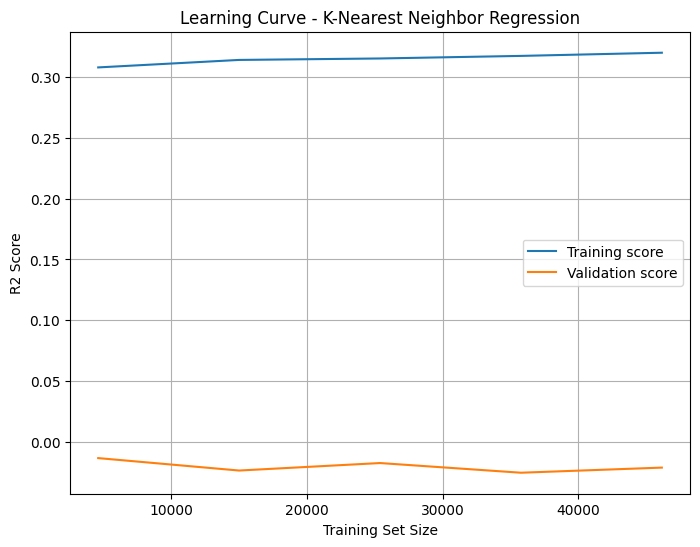

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, np.round(y_train_pred))
accuracy_test = accuracy_score(y_test, np.round(y_test_pred))

print("K-Nearest Neighbor Regression:")
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve - K-Nearest Neighbor Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Model 1: Logistic Regression (for comparison purposes)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Model 2: Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Model 3: Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_accuracy = accuracy_score(y_test, np.round(svr_pred))

# Model 4: K-Nearest Neighbor Regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, np.round(knn_pred))

# Compare accuracies
model_names = ['Logistic Regression', 'Decision Tree Regression', 'Support Vector Regression', 'K-Nearest Neighbor Regression']
accuracies = [logreg_accuracy, dt_accuracy, svr_accuracy, knn_accuracy]

for model, accuracy in zip(model_names, accuracies):
    print(f"{model}: Accuracy = {accuracy}")

Logistic Regression: Accuracy = 0.8888657792567942
Decision Tree Regression: Accuracy = 1.0
Support Vector Regression: Accuracy = 0.8888657792567942
K-Nearest Neighbor Regression: Accuracy = 0.8747920133111481


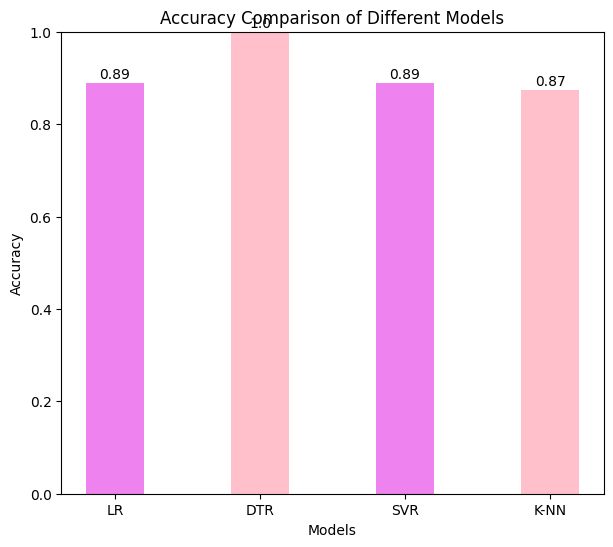

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
model_names = ['LR', 'DTR', 'SVR', 'K-NN']
accuracies = [logreg_accuracy, dt_accuracy, svr_accuracy, knn_accuracy]

# Define custom colors for the bars
colors = ['violet', 'pink', 'violet', 'pink']

# Set the width of the bars
bar_width = 0.4

# Plotting the bar chart
plt.figure(figsize=(7, 6))
plt.bar(model_names, accuracies, width=bar_width, color=colors)

# Customize the appearance of the bars
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1

# Show the values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.show()
